# **KAU Deep Learning (Spring 2021)**
### SVM & Deep Feedforard Networks (DFNs) (In-class activity for Week 10)

**NOTE**
Some descriptions & codes from the below resources:
1. [Hands-On Machine Learning with Scikit-Learn, Keras & Tensorflow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)
2. https://www.python-course.eu/machine_learning_data_visualization.php
3. http://yann.lecun.com/exdb/mnist/

---

##1. Get the data
### 1.1 A collection of ready-to-use datasets (scikit-learn & Tensorflow)

### (Example 1) The IRIS dataset
> Data Set Information:
> 
> This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.
> 
> Predicted attribute: class of iris plant.
>
> This is an exceedingly simple domain.
>
> This data differs from the data presented in Fishers article (identified by Steve Chadwick, spchadwick '@' espeedaz.net ). The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature. The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features.

(from http://archive.ics.uci.edu/ml/datasets/Iris)

In [ ]:
from sklearn import datasets

# Ths Iris dataset
iris = datasets.load_iris()

# The resulting dataset is a Bunch object:
print(type(iris))

# You can see what's available for this data type by using the method keys():
print(iris.keys())
# A Bunch object is similar to a dicitionary, but it additionally allows accessing the keys in an attribute style:
print(iris.target_names)

# The information about the class of each sample, i.e. the labels, is stored in the "target" attribute of the data set:
print(iris.data.shape)
print(iris.target.shape)

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
['setosa' 'versicolor' 'virginica']
(150, 4)
(150,)


In [ ]:
import pandas as pd

df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


### (Example 2) Digits dataset for Recognizing hand-written digits
> Data Set Information:
> 
> The digits dataset consists of 8x8 pixel images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each image.

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

# Let's have a look at the number of items and features:
n_samples, n_features = digits.data.shape
print((n_samples, n_features))

# The data is also available at digits.images. This is the raw data of the images in the form of 8 lines and 8 columns.
# With "data" an image corresponds to a one-dimensional Numpy array with the length 64, and "images" representation contains 2-dimensional numpy arrays with the shape (8, 8)
print("Shape of an item: ", digits.data[0].shape)
print("Data type of an item: ", type(digits.data[0]))
print("Shape of an item: ", digits.images[0].shape)
print("Data tpye of an item: ", type(digits.images[0]))

(1797, 64)
Shape of an item:  (64,)
Data type of an item:  <class 'numpy.ndarray'>
Shape of an item:  (8, 8)
Data tpye of an item:  <class 'numpy.ndarray'>


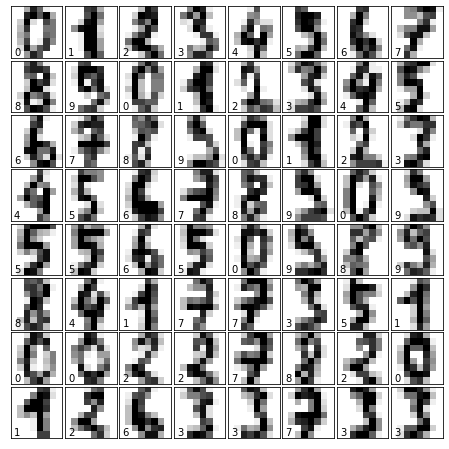

In [ ]:
import matplotlib.pyplot as plt

# Let's visualize the data. It's little bit more involved than the simple scatter-plot we used above, but we can do it rather quickly.
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

(Example 3) MNIST Handwritten Digit Classification Dataset

> Data Set Information:
>
> The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST.
>
> It is grayscale images of handwritten single digits between 0 and 9.
>
> The images have been size-normalized and centered in a fixed-size (28 x 28)
>
> The task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively.


In [ ]:
!pip install -q tensorflow-datasets tensorflow

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Construct a tf.data.Dataset
# tfds.load
# 1. The easiest way of loading a dataset is tfds.load. It will:
# 2. Download the data and save it as tfrecord files.
# 3. Load the tfrecord and create the tf.data.Dataset.
ds, info = tfds.load('mnist', split='train', with_info=True)
#ds = ds.take(1)  # Only take a single example
tfds.as_dataframe(ds.take(10), info)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


,image,label
0,,4
1,,1
2,,0
3,,7
4,,8
5,,1
6,,2
7,,7
8,,1
9,,6


### 1.2 Loading CSV Files

#### California Housing
---

#### Source
This dataset is a modified version of the California Housing dataset available from [Luís Torgo's page](http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html) (University of Porto). Luís Torgo obtained it from the StatLib repository (which is closed now). The dataset may also be downloaded from StatLib mirrors.

This dataset appeared in a 1997 paper titled *Sparse Spatial Autoregressions* by Pace, R. Kelley and Ronald Barry, published in the *Statistics and Probability Letters* journal. They built it using the 1990 California census data. It contains one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

---
#### Tweaks
The dataset in this directory is almost identical to the original, with two differences:

* 207 values were randomly removed from the `total_bedrooms` column, so we can discuss what to do with missing data.
* An additional categorical attribute called `ocean_proximity` was added, indicating (very roughly) whether each block group is near the ocean, near the Bay area, inland or on an island. This allows discussing what to do with categorical data.

Note that the block groups are called "districts" in the Jupyter notebooks, simply because in some contexts the name "block group" was confusing.

#### Data description

    >>> housing.info()
    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 20640 entries, 0 to 20639
    Data columns (total 10 columns):
    longitude             20640 non-null float64
    latitude              20640 non-null float64
    housing_median_age    20640 non-null float64
    total_rooms           20640 non-null float64
    total_bedrooms        20433 non-null float64
    population            20640 non-null float64
    households            20640 non-null float64
    median_income         20640 non-null float64
    median_house_value    20640 non-null float64
    ocean_proximity       20640 non-null object
    dtypes: float64(9), object(1)
    memory usage: 1.6+ MB
    
    >>> housing["ocean_proximity"].value_counts()
    <1H OCEAN     9136
    INLAND        6551
    NEAR OCEAN    2658
    NEAR BAY      2290
    ISLAND           5
    Name: ocean_proximity, dtype: int64
    
    >>> housing.describe()
              longitude      latitude  housing_median_age   total_rooms  \
    count  16513.000000  16513.000000        16513.000000  16513.000000   
    mean    -119.575972     35.639693           28.652335   2622.347605   
    std        2.002048      2.138279           12.576306   2138.559393   
    min     -124.350000     32.540000            1.000000      6.000000   
    25%     -121.800000     33.940000           18.000000   1442.000000   
    50%     -118.510000     34.260000           29.000000   2119.000000   
    75%     -118.010000     37.720000           37.000000   3141.000000   
    max     -114.310000     41.950000           52.000000  39320.000000   

           total_bedrooms    population    households  median_income  
    count    16355.000000  16513.000000  16513.000000   16513.000000  
    mean       534.885112   1419.525465    496.975050       3.875651  
    std        412.716467   1115.715084    375.737945       1.905088  
    min          2.000000      3.000000      2.000000       0.499900  
    25%        295.000000    784.000000    278.000000       2.566800  
    50%        433.000000   1164.000000    408.000000       3.541400  
    75%        644.000000   1718.000000    602.000000       4.745000  
    max       6210.000000  35682.000000   5358.000000      15.000100
 

#### 1.2.1 From a local drive

To upload from your local drive, start with the following code:

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
!ls -al
!pwd

total 16
drwxr-xr-x 1 root root 4096 May  6 13:44 .
drwxr-xr-x 1 root root 4096 May 12 13:42 ..
drwxr-xr-x 4 root root 4096 May  6 13:43 .config
drwxr-xr-x 1 root root 4096 May  6 13:44 sample_data
/content


In [ ]:
import os
import pandas as pd

HOUSING_PATH = "/content"

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()
housing.head()

FileNotFoundError: ignored

#### 1.2.3 From Google Drive

The example below shows how to mount your Google Drive on your runtime using an authorization code, and how to write and read files there.

This only supports reading, writing, and moving files; to programmatically modify sharing settings or other metadata, use one of the other options below.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive/My Drive/Colab_Notebooks/Deep_learning'

'1st Programming Assignment(2016124087 김현용).ipynb'
 assignment1.zip
 housing.csv
 KAU_deep_learning_2021_KNN_SVM_DFNs.ipynb
 KAU_deep_learning_2021_Machine_Learning_Basics.ipynb
'Lab activity 1(2016124087 김현용).ipynb'
'Lab activity 2(2016124087 김현용).ipynb'
 week4_deep_learning_incls_spring2021.ipynb
 week5_deep_learning_incls_spring2021.ipynb


In [ ]:
import os
import pandas as pd

HOUSING_PATH = "/content/drive/My Drive/Colab_Notebooks/Deep_learning"

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## 2.Supervised Learning Algorithms
---
### 2.1 k-Nearest Neighbor (K-NN)
#### A. KAU binary classification dataset
KAU binary classification dataset (Plane vs. No Plane) created by Jangwon Lee leejang@kau.ac.kr

This dataset is constructed based on the below reference datasets

[1] Fine-Grained Visual Classification of Aircraft, S. Maji, J. Kannala, E. Rahtu, M. Blaschko, A. Vedaldi, arXiv.org, 2013

[2] http://www.vision.caltech.edu/Image_Datasets/Caltech101/


In [ ]:
import os
import zipfile

local_zip = '/content/drive/My Drive/Colab_Notebooks/Deep_learning/assignment1.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
!ls -al /tmp
!ls -al /tmp/dataset
!ls -al /tmp/dataset/train

total 32
drwxrwxrwt 1 root root 4096 May 13 00:40 .
drwxr-xr-x 1 root root 4096 May 13 00:38 ..
-rw-r--r-- 1 root root 1487 May 13 00:38 dap_multiplexer.831f02581ec5.root.log.INFO.20210513-003856.48
lrwxrwxrwx 1 root root   61 May 13 00:38 dap_multiplexer.INFO -> dap_multiplexer.831f02581ec5.root.log.INFO.20210513-003856.48
drwxr-xr-x 4 root root 4096 May 13 00:40 dataset
srwxr-xr-x 1 root root    0 May 13 00:38 debugger_3lmqlnxhz
srw------- 1 root root    0 May 13 00:40 drivefs_ipc.0
srw------- 1 root root    0 May 13 00:40 drivefs_ipc.0_shell
drwx------ 2 root root 4096 May 13 00:38 initgoogle_syslog_dir.0
-rw-r--r-- 1 root root  351 May 13 00:40 README
drwx------ 2 root root 4096 May 13 00:40 tmpw8pgj9h0
total 16
drwxr-xr-x 4 root root 4096 May 13 00:40 .
drwxrwxrwt 1 root root 4096 May 13 00:40 ..
drwxr-xr-x 4 root root 4096 May 13 00:40 test
drwxr-xr-x 4 root root 4096 May 13 00:40 train
total 92
drwxr-xr-x 4 root root  4096 May 13 00:40 .
drwxr-xr-x 4 root root  4096 May 13 00:40

In [ ]:
base_dir = '/tmp/dataset'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Directory with our training plane pictures
train_planes_dir = os.path.join(train_dir, 'planes')

# Directory with our training no plane pictures
train_no_planes_dir = os.path.join(train_dir, 'no_planes')

# Directory with our test plane pictures
test_planes_dir = os.path.join(test_dir, 'planes')

# Directory with our test no plane pictures
test_no_planes_dir = os.path.join(test_dir, 'no_planes')

In [ ]:
train_plane_fnames = os.listdir(train_planes_dir)
print(train_plane_fnames[:10])

train_no_plane_fnames = os.listdir(train_no_planes_dir)
train_no_plane_fnames.sort()
print(train_no_plane_fnames[:10])

['1291351.jpg', '0867011.jpg', '1302049.jpg', '1142892.jpg', '0367794.jpg', '1933878.jpg', '1364710.jpg', '2019474.jpg', '0606125.jpg', '1252133.jpg']
['BACKGROUND_Google_image_0008.jpg', 'BACKGROUND_Google_image_0010.jpg', 'BACKGROUND_Google_image_0015.jpg', 'BACKGROUND_Google_image_0020.jpg', 'BACKGROUND_Google_image_0034.jpg', 'BACKGROUND_Google_image_0036.jpg', 'BACKGROUND_Google_image_0058.jpg', 'BACKGROUND_Google_image_0060.jpg', 'BACKGROUND_Google_image_0065.jpg', 'BACKGROUND_Google_image_0085.jpg']


In [ ]:
print('total training planes images:', len(os.listdir(train_planes_dir)))
print('total training no_planes images:', len(os.listdir(train_no_planes_dir)))
print('total test planes images:', len(os.listdir(test_planes_dir)))
print('total test no_planes images:', len(os.listdir(test_no_planes_dir)))

total training planes images: 1000
total training no_planes images: 1000
total test planes images: 500
total test no_planes images: 500


Now let's take a look at a few pictures to get a better sense of what the planes and no_planes datasets look like.
 First, configure the matplot parameters:

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Now, display a batch of 8 plane and 8 no_plane pictures. You can rerun the cell to see a fresh batch each time:

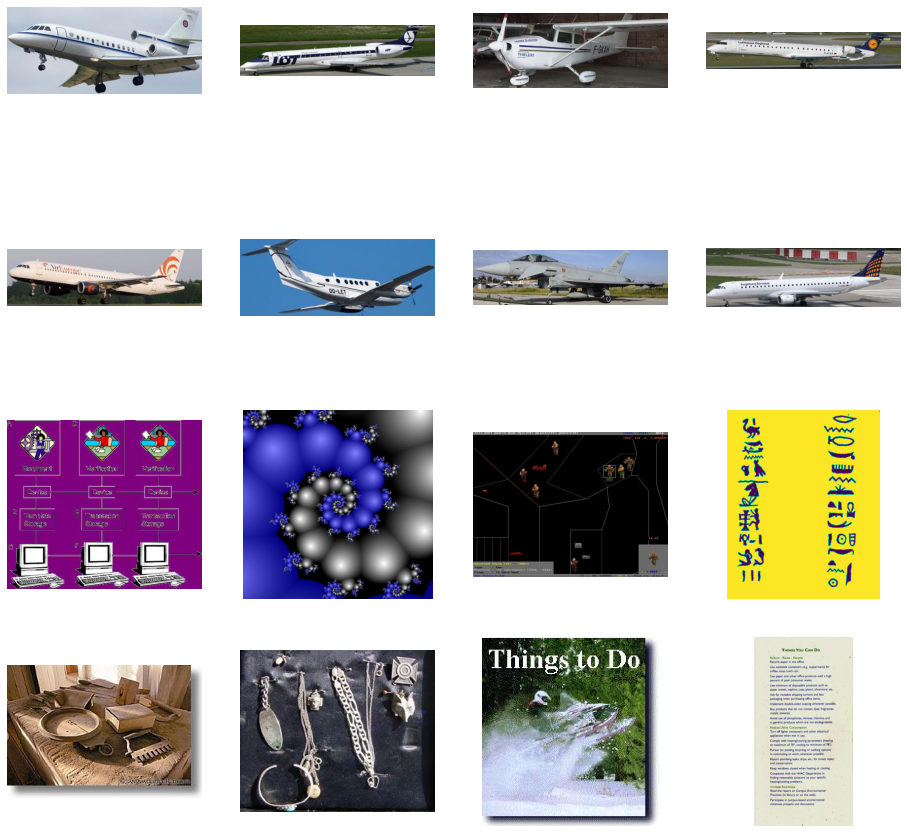

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_plane_pix = [os.path.join(train_planes_dir, fname) 
                for fname in train_plane_fnames[pic_index-8:pic_index]]
next_no_plane_pix = [os.path.join(train_no_planes_dir, fname) 
                for fname in train_no_plane_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_plane_pix+next_no_plane_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

#### B. Loading the KAU binary classification dataset
#### Without any fancy libraries like Tensorflow

In [ ]:
import numpy as np
from pathlib import Path
from skimage.io import imread
from sklearn.utils import Bunch
from skimage.transform import resize

def load_image_files(container_path, dimension=(50, 50, 3)):
    """
    Load image files with categories as subfolder names 
    which performs like scikit-learn sample dataset
    
    Parameters
    ----------
    container_path : string or unicode
        Path to the main folder holding one subfolder per category
    dimension : tuple
        size to which image are adjusted to
        
    Returns
    -------
    Bunch
    """
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]

    descr = "A image classification dataset"
    images = []
    flat_data = []
    target = []
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            img = imread(file)
            img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
            flat_data.append(img_resized.flatten()) 
            images.append(img_resized)
            target.append(i)
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)

    return Bunch(data=flat_data,
                 target=target,
                 target_names=categories,
                 images=images,
                 DESCR=descr)

In [ ]:
image_dataset = load_image_files(train_dir)

In [ ]:
import tensorflow as tf
from tensorflow import keras

################################
batch_size = 32
num_of_train_imgs = 2000
num_of_test_imgs = 1000
img_height = 150
img_width = 150

################################

# Train
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=num_of_train_imgs)

# Validation
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=num_of_train_imgs)

# Test
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  image_size=(img_height, img_width),

  batch_size=num_of_test_imgs)

Found 2000 files belonging to 2 classes.
Using 1600 files for training.
Found 2000 files belonging to 2 classes.
Using 400 files for validation.
Found 1000 files belonging to 2 classes.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['no_planes', 'planes']


tf.Tensor(
[[[[133.5      144.5      164.5     ]
   [131.5      142.5      162.5     ]
   [130.       141.       161.      ]
   ...
   [121.       132.       144.      ]
   [130.5      144.5      160.      ]
   [126.       142.       160.5     ]]

  [[133.5      144.5      164.5     ]
   [131.67     142.67     162.67    ]
   [130.51     141.51     161.51    ]
   ...
   [ 93.46     104.46     116.8     ]
   [102.79     116.28     131.95    ]
   [114.27     130.27     148.77    ]]

  [[133.5      144.5      164.5     ]
   [131.95     142.95     162.95    ]
   [131.35     142.35     162.35    ]
   ...
   [ 48.100002  59.100002  72.      ]
   [ 57.15      69.8       85.75    ]
   [ 94.950005 110.950005 129.45    ]]

  ...

  [[154.70004  145.70004  138.70004 ]
   [153.65004  144.65004  137.65004 ]
   [153.55005  144.55005  137.55005 ]
   ...
   [127.850006 121.850006 109.850006]
   [128.55     122.55     110.55    ]
   [130.20001  124.200005 112.200005]]

  [[139.0199   130.0199   123.0199

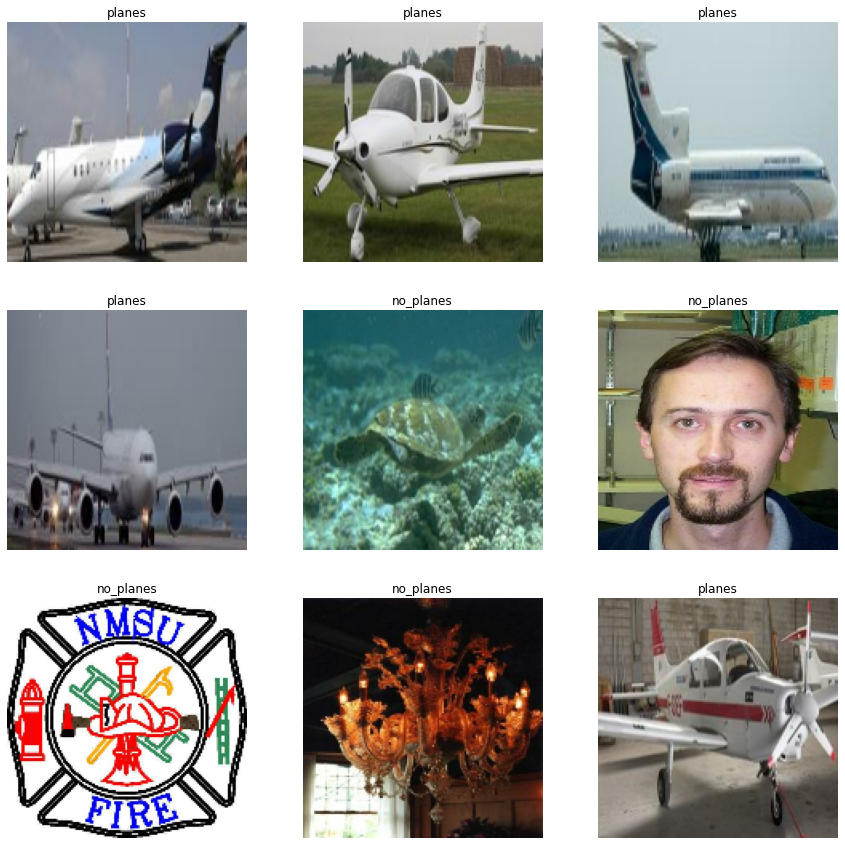

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Checking out the return value of the image_dataset_from_directory function!

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
# image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

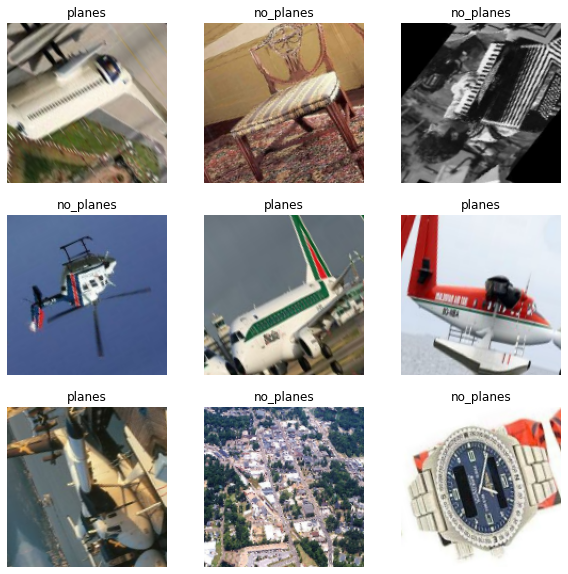

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    augmented_image = data_augmentation(images)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_image[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
aug_ds = train_ds.map(
  lambda x, y: (data_augmentation(images), y))

In [ ]:
print(type(aug_ds))

for image_batch, labels_batch in aug_ds:
  # image_batch: tensors of shape (batch_size, image_size[0], image_size[1], num_channels)
  Xtr = image_batch.numpy()
  print(Xtr.shape)
  # labels_batch: the labels are an int32 tensor of shape (batch_size,)
  Ytr = labels_batch.numpy()
  print(Ytr.shape) 
  break


# flatten out all images to be one-dimensional
Xtr_rows = Xtr.reshape(Xtr.shape[0], img_height * img_width * 3) # Xtr_rows becomes 1600 x (50 x 50 x 3 = 7500)
print(Xtr_rows.shape)

<class 'tensorflow.python.data.ops.dataset_ops.MapDataset'>
(1600, 150, 150, 3)
(1600,)
(1600, 67500)


#### C. Building kNN classifier

It consists of two stages:
* During training, the classifier takes the training data and simply remembers it
* During testing, kNN classifies every test image by comparing to all training images and transfering the labels of the k most similar training examples
* The value of k is a hypter parameter that can be found by cross-validation test!

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtr_rows, Ytr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
for image_batch, labels_batch in test_ds:
  # image_batch: tensors of shape (batch_size, image_size[0], image_size[1], num_channels)
  Xte = image_batch.numpy()
  print(Xte.shape)
  # labels_batch: the labels are an int32 tensor of shape (batch_size,)
  Yte = labels_batch.numpy()
  print(Yte.shape) 
  break

# flatten out all images to be one-dimensional
Xte_rows = Xte.reshape(Xte.shape[0], img_height * img_width * 3) # Xtr_rows becomes 1000 x (50 x 50 x 3 = 7500)
print(Xte_rows.shape)

(1000, 150, 150, 3)
(1000,)
(1000, 67500)


In [ ]:
#check accuracy of our model on the test data
knn.score(Xte_rows, Yte)

0.887

### 2.2 Support Vector Machine (SVM)
#### A. "linear" kernel and C = 100 vs C = 1

* small C: a larger-margin separating hyperplane (Soft Margin, allows more misclassfies)
* large C: a smaller-margin hyperplane (Hard Margin)

For the IRIS dataset

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

##########################################################

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)

# Standardization
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])


For the KAU aircraft dataset

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# SVM Linear Classifier model
svm_clf_linear_c100 = SVC(kernel="linear", C=100)
svm_clf_linear_c100.fit(Xtr_rows, Ytr)

svm_clf_linear_c1 = SVC(kernel="linear", C=1)
svm_clf_linear_c1.fit(Xtr_rows, Ytr)


In [ ]:
from sklearn import metrics
# Predict
Yte_pred_linear_c100 = svm_clf_linear_c100.predict(Xte_rows)
Yte_pred_linear_c1 = svm_clf_linear_c1.predict(Xte_rows)

# Report
print("Classification report for - \n{}:\n{}\n".format(
    svm_clf_linear_c100, metrics.classification_report(Yte, Yte_pred_linear_c100)))
print("Classification report for - \n{}:\n{}\n".format(
    svm_clf_linear_c1, metrics.accuracy_score(Yte, Yte_pred_linear_c1)))

#### B. Using Kernel Trick
##### "rbf" kernel
In machine learning, the radial basis function kernel, or RBF kernel, is a popular kernel function used in various kernelized learning algorithms. In particular, it is commonly used in support vector machine classification.
(definition from https://en.wikipedia.org/wiki/Radial_basis_function_kernel#:~:text=In%20machine%20learning%2C%20the%20radial,in%20support%20vector%20machine%20classification.)

In [ ]:
# SVM model with the kernel trick (RBF)
svm_clf_rbf_c1 = SVC(kernel="rbf", C=1)
svm_clf_rbf_c1.fit(Xtr_rows, Ytr)

In [ ]:
from sklearn import metrics
# Predict
Yte_pred_rbf_c1 = svm_clf_rbf_c1.predict(Xte_rows)

# Report
print("Classification report for - \n{}:\n{}\n".format(
    svm_clf_rbf_c1, metrics.accuracy_score(Yte, Yte_pred_rbf_c1)))

#### C. Preprocessing data
Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: **Gaussian with zero mean and unit variance**.

In [ ]:
from sklearn.preprocessing import StandardScaler
# scaler
scaler = StandardScaler().fit(Xtr_rows)

Xtr_scaled = scaler.transform(Xtr_rows)
Xte_scaled = scaler.transform(Xte_rows)

print(Xtr_rows.mean(axis=0))
print(Xtr_rows.std(axis=0))
print("="*50)
print(Xtr_scaled.mean(axis=0))
print(Xtr_scaled.std(axis=0))

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics

# SVM model with the kernel trick (RBF)
svm_clf_rbf_c1 = SVC(kernel="rbf", C=1)
svm_clf_rbf_c1.fit(Xtr_scaled, Ytr)

# Predict
Yte_pred_rbf_c1 = svm_clf_rbf_c1.predict(Xte_scaled)
#print(Yte_pred_rbf_c1)
#print(Yte_pred_rbf_c1.shape)

# Report
print("Classification report for - \n{}:\n{}\n".format(
    svm_clf_rbf_c1, metrics.accuracy_score(Yte, Yte_pred_rbf_c1)))

#### Using PCA & Whitening for data preprocessing

We could proceed by simply using each pixel value as a feature, but often it is more effective to use some sort of preprocessor to extract more meaningful features; here we will use a principal component analysis (see [In Depth: Principal Component Analysis](05.09-Principal-Component-Analysis.ipynb)) to extract 150 fundamental components to feed into our support vector machine classifier.
We can do this most straightforwardly by packaging the preprocessor and the classifier into a single pipeline:



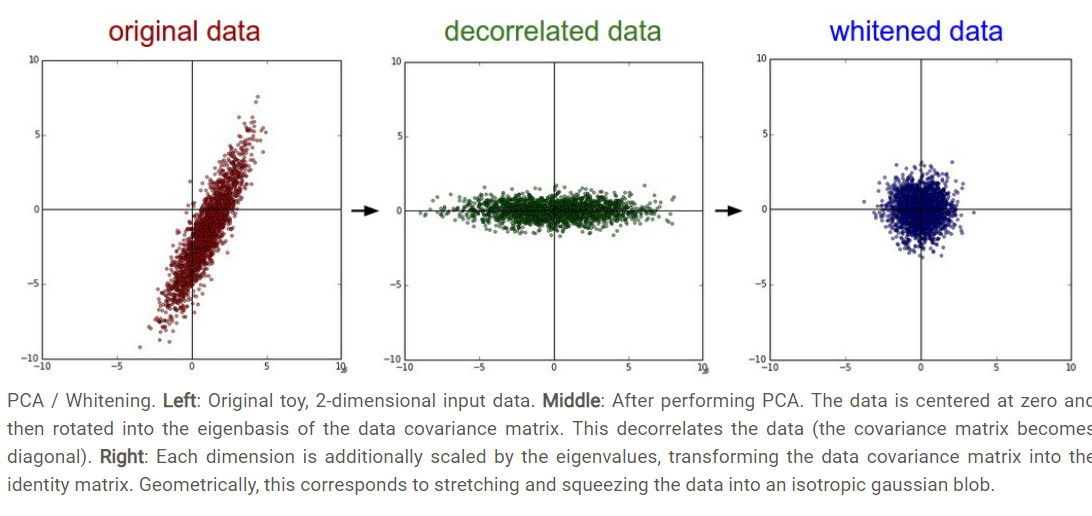

The above figure is originally from: CS231n at Stanford University
* link: https://cs231n.github.io/neural-networks-2/

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'svc__C': [1, 5],
              'svc__gamma': [0.0001, 0.001]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtr_rows, Ytr)
print(grid.best_params_)

In [ ]:
# best SVM estimator
best_model = grid.best_estimator_

# Predict
Yte_pred_best = best_model.predict(Xte_rows)

# Report
print("Classification report for - \n{}:\n{}\n".format(
    best_model, metrics.accuracy_score(Yte, Yte_pred_best)))

### 2.3 Deep(?) Feedforward Neural Networks (DFNs)

#### A. Building Your own  Deep (in fact, it will have only three layers :) from Scratch using Keras!

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Neural network
model = Sequential()
# Our input feature map is 150x150x3 = 67500
# Create a fully connected layer with ReLU activation and 1024 hidden units
model.add(Dense(1024, input_dim=67500, activation='relu'))
# Create a fully connected layer with ReLU activation and 512 hidden units
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1024)              69121024  
_________________________________________________________________
dense_7 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 69,646,337
Trainable params: 69,646,337
Non-trainable params: 0
_________________________________________________________________


We will use "binary cross entropy as our loss function" and "RMSprop" as our optimizer

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

B. Now. let's train the our first model and check the model’s performance on the test set!

In [ ]:
history = model.fit(Xtr_rows, Ytr, epochs=15, batch_size=16, validation_data=(Xte_rows, Yte))

Epoch 1/15
100/100 [==============================] - 62s 607ms/step - loss: 10028.1288 - acc: 0.5189 - val_loss: 90.8503 - val_acc: 0.5000
Epoch 2/15
100/100 [==============================] - 60s 601ms/step - loss: 17.5772 - acc: 0.4932 - val_loss: 0.6961 - val_acc: 0.5020
Epoch 3/15
100/100 [==============================] - 60s 602ms/step - loss: 0.8414 - acc: 0.5146 - val_loss: 0.6932 - val_acc: 0.5050
Epoch 4/15
100/100 [==============================] - 60s 601ms/step - loss: 1.1710 - acc: 0.5203 - val_loss: 0.6926 - val_acc: 0.4990
Epoch 5/15
100/100 [==============================] - 60s 603ms/step - loss: 0.7120 - acc: 0.4774 - val_loss: 0.6926 - val_acc: 0.4990
Epoch 6/15
100/100 [==============================] - ETA: 0s - loss: 0.6927 - acc: 0.5083

KeyboardInterrupt: ignored

C. Change our model using convolutional layers!

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

# Our input feature map is 50x50x3: 50x50 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0     

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 16 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 50x50
        batch_size=16,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow test images in batches of 20 using test_datagen generator
test_generator = val_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      epochs=15,
      validation_data=test_generator)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
125/125 [==============================] - 54s 431ms/step - loss: 0.5322 - acc: 0.8195 - val_loss: 0.4063 - val_acc: 0.8220
Epoch 2/15
125/125 [==============================] - 53s 428ms/step - loss: 0.2270 - acc: 0.9145 - val_loss: 0.1834 - val_acc: 0.9320
Epoch 3/15
125/125 [==============================] - 54s 432ms/step - loss: 0.1665 - acc: 0.9415 - val_loss: 0.1785 - val_acc: 0.9290
Epoch 4/15
125/125 [==============================] - 54s 429ms/step - loss: 0.1217 - acc: 0.9550 - val_loss: 0.2882 - val_acc: 0.9110
Epoch 5/15
125/125 [==============================] - 53s 428ms/step - loss: 0.0753 - acc: 0.9740 - val_loss: 0.1838 - val_acc: 0.9380
Epoch 6/15
125/125 [==============================] - 53s 427ms/step - loss: 0.0629 - acc: 0.9765 - val_loss: 0.2172 - val_acc: 0.9130
Epoch 7/15
125/125 [==============================] - 53s 427ms/step - loss: 0.0406 - acc: 0.9835 - val_loss: 0.2735 - val_acc: 0.9340
Epoch 8/15
125/125 [==============================] - 5

Data Preprocessing
Let's set up data generators that will read pictures in our source folders, convert them to float32 tensors, and feed them (with their labels) to our network. We'll have one generator for the training images and one for the validation images. Our generators will yield batches of 16 images of size 50x50 and their labels (binary).

As you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network. (It is uncommon to feed raw pixels into a convnet.) In our case, we will preprocess our images by normalizing the pixel values to be in the [0, 1] range (originally all values are in the [0, 255] range).

In Keras this can be done via the keras.preprocessing.image.ImageDataGenerator class using the rescale parameter. This ImageDataGenerator class allows you to instantiate generators of augmented image batches (and their labels) via .flow(data, labels) or .flow_from_directory(directory). These generators can then be used with the Keras model methods that accept data generators as inputs: fit_generator, evaluate_generator, and predict_generator.


Let's visualize the model's representations!

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Let's prepare a random input image of a plane or no_plane from the training set.
plane_img_files = [os.path.join(train_planes_dir, f) for f in train_plane_fnames]
no_plane_img_files = [os.path.join(train_no_planes_dir, f) for f in train_no_plane_fnames]
img_path = random.choice(plane_img_files + no_plane_img_files)

img = load_img(img_path, target_size=(50, 50))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (50, 50, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 50, 50, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

NameError: ignored

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

---
## (Simple & Easy!) Programming Assignment 1
### Binary Classification on the KAU Aircraft dataset

For this assignment you need to build your own deep learning model to classify
as "1: airplane vs 0: non-airplanes" given images. This assignment is an opportunity to gain experience writing deep learning applications based on your knowledge that you have learned so far in the classes.

### **NOTICE**
* You can recyle the above code for this assignment, but you should change and add the below things

 
1. Change the network to have 150 x 150 images as input
2. Add data augmentation code to improve the performance
3. Try three different optimizers (Adam, AdaGrad, and RMSProb)

For the data augmentation, please find the more information from the below websites:

https://keras.io/api/preprocessing/image/
https://www.tensorflow.org/tutorials/images/data_augmentation

In [ ]:
# image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])


NameError: ignored